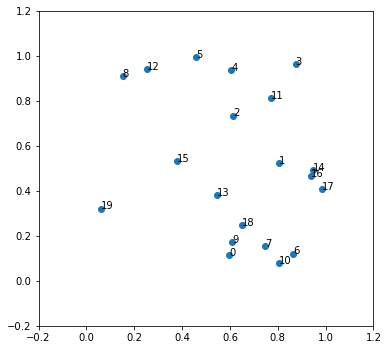

In [185]:
from random import random

puntos = {}

# Can1tidad de puntos
n = 20

for i in range(n):
    # Se generan puntos al azar de coordenadas x, y
    t = (random(), random())
    puntos[i] = t
    
# Se muestran los puntos
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5.8))
plt.scatter(*zip(*puntos.values()))
for i in puntos.keys():
    plt.annotate(i, (puntos[i][0], puntos[i][1]))
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.show()

In [196]:
poligono_convexo = []

# Se eligen los extremos superior e inferior
def encontrar_arista(conjunto, a, b, dir):
    if len(conjunto) == 0:
        return
    else:
        m = (puntos[a][1] - puntos[b][1]) / (puntos[a][0] - puntos[b][0])
        A = m
        B = -1
        C = - m * puntos[a][0] + puntos[a][1] 
        dist_max = 0
        local_max = None
        for i in conjunto:
            x = puntos[i][0]
            y = puntos[i][1]
            dist = abs(A * x + B * y + C) / (A ** 2 + B ** 2) ** 0.5
            if dist > dist_max:
                dist_max = dist
                local_max = i
                
        # Ya que se encuentra el más lejano, se unen
        s1 = []
        s2 = []
        s1a = []
        s2a = []
        for i in conjunto:
            if i == local_max:
                continue
            v1 = (puntos[b][0] - puntos[local_max][0], puntos[b][1] - puntos[local_max][1])
            v2 = (puntos[b][0] - puntos[i][0], puntos[b][1] - puntos[i][1])
            xp = v1[0]*v2[1] - v1[1]*v2[0]  # Cross product
            if xp < 0:
                s1.append(i)
            elif xp > 0:
                s2.append(i)
            
            v1 = (puntos[local_max][0] - puntos[a][0], puntos[local_max][1] - puntos[a][1])
            v2 = (puntos[local_max][0] - puntos[i][0], puntos[local_max][1] - puntos[i][1])
            xp = v1[0]*v2[1] - v1[1]*v2[0]  # Cross product
            if xp < 0:
                s1a.append(i)
            elif xp > 0:
                s2a.append(i)
            
        
        aristas.append(local_max)
        if dir == 'i':
            encontrar_arista(s1, local_max, b, 'i')
            encontrar_arista(s1a, local_max, a, 'i')
        else:
            encontrar_arista(s2, local_max, b, 'd')
            encontrar_arista(s2a, a, local_max, 'd')

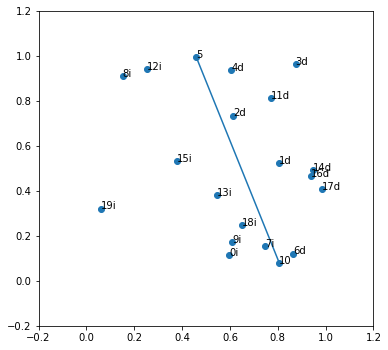

[0, 7, 8, 9, 12, 13, 15, 18, 19]
[1, 2, 3, 4, 6, 11, 14, 16, 17]


In [197]:
aristas = []

min_y = float("inf")
max_y = 0

punto_max = None
punto_min = None

s1 = []
s2 = []

for i in puntos.keys():
    if puntos[i][1] > max_y:
        max_y = puntos[i][1]
        punto_max = i
    if puntos[i][1] < min_y:
        min_y = puntos[i][1]
        punto_min = i

# Se separan en izquierda y derecha
plt.figure(figsize=(6, 5.8))
plt.scatter(*zip(*puntos.values()))
for i in puntos.keys():
    if i == punto_max or i == punto_min:
        plt.annotate(str(i), (puntos[i][0], puntos[i][1]))
        continue
    # https://stackoverflow.com/a/3838398 ¡ESTO!
    v1 = (puntos[punto_max][0] - puntos[punto_min][0], puntos[punto_max][1] - puntos[punto_min][1])   # Vector 1
    v2 = (puntos[punto_max][0] - puntos[i][0], puntos[punto_max][1] - puntos[i][1])   # Vector 1
    xp = v1[0]*v2[1] - v1[1]*v2[0]  # Cross product
    t = ''
    if xp < 0:
        t = 'i'
        s1.append(i)
    elif xp > 0:
        t = 'd'
        s2.append(i)
    else:
        t = ''
    plt.annotate(str(i) + t, (puntos[i][0], puntos[i][1]))

plt.plot([puntos[punto_max][0], puntos[punto_min][0]], [puntos[punto_max][1], puntos[punto_min][1]])
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.show()

print(s1)
print(s2)

In [198]:
aristas.append(punto_min)
aristas.append(punto_max)
encontrar_arista(s1, punto_min, punto_max, 'i')
encontrar_arista(s2, punto_min, punto_max, 'd')

In [199]:
print(aristas)

[10, 5, 19, 8, 12, 0, 3, 17, 6]
